In [12]:
import matplotlib.pyplot as plt
import sklearn.datasets as datasets
import numpy as np
import pandas as pd
import sklearn.preprocessing as preprocessing
import sklearn.decomposition as decomposition

In [20]:
df = pd.read_csv("data/penguins.csv", sep=",")
df.dropna(inplace=True)
df.dropna(subset=['sex'])
df

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,MALE
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,FEMALE
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,FEMALE
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,FEMALE
5,Adelie,Torgersen,39.3,20.6,190.0,3650.0,MALE
...,...,...,...,...,...,...,...
338,Gentoo,Biscoe,47.2,13.7,214.0,4925.0,FEMALE
340,Gentoo,Biscoe,46.8,14.3,215.0,4850.0,FEMALE
341,Gentoo,Biscoe,50.4,15.7,222.0,5750.0,MALE
342,Gentoo,Biscoe,45.2,14.8,212.0,5200.0,FEMALE


In [26]:
sex_col = df["sex"]
Y = np.array(sex_col.apply(lambda n: 1.0 if n == "MALE" else -1.0))

X = np.c_[df.bill_length_mm.values, 
          df.bill_depth_mm.values,
          df.flipper_length_mm.values,
          df.body_mass_g.values]
X = preprocessing.scale(X)
print(X)

[[-0.89604189  0.7807321  -1.42675157 -0.56847478]
 [-0.82278787  0.11958397 -1.06947358 -0.50628618]
 [-0.67627982  0.42472926 -0.42637319 -1.1903608 ]
 ...
 [ 1.17338426 -0.74499437  1.50292796  1.91906927]
 [ 0.22108196 -1.20271231  0.78837197  1.23499466]
 [ 1.08181673 -0.54156417  0.85982757  1.48374906]]


In [32]:
Is = np.argsort(Y)
Y = Y[Is]
X = X[Is]

In [28]:
import sklearn.decomposition as decomposition

In [29]:
pca = decomposition.PCA(2)
U = pca.fit_transform(X)

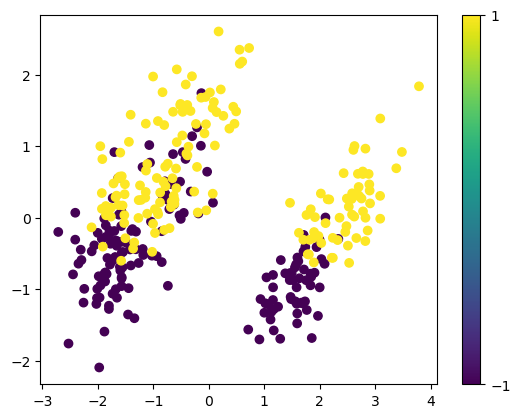

In [30]:
cs = plt.scatter(U[:,0], U[:,1], c=Y)
plt.colorbar(cs, ticks=[-1,1])
plt.show()